
🌞 Training & Tuning for Solar Production
✅ R² Score: 0.9530
✅ MAE: 167.49 MW


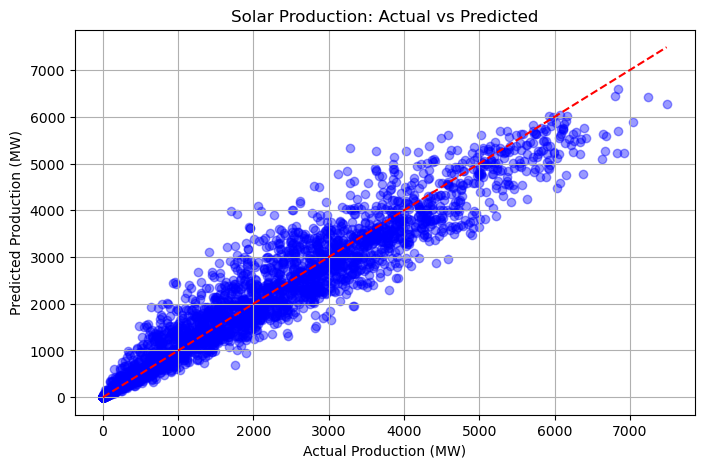


🌞 Training & Tuning for Wind Production
✅ R² Score: 0.9596
✅ MAE: 489.19 MW


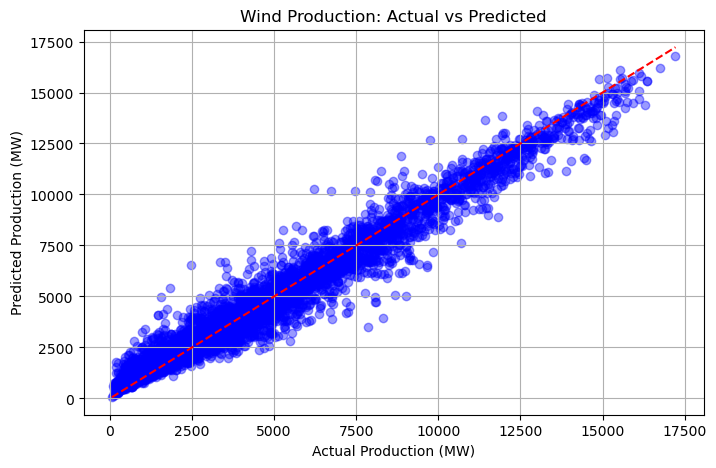

In [1]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

# 📁 Load your data
file_path = 'solar_wind.xlsx.csv'  # Change this if needed
df = pd.read_csv(file_path)

# ✅ Convert 'Date and Hour' to datetime with error handling
df['Date and Hour'] = pd.to_datetime(df['Date and Hour'], errors='coerce', utc=True)
df = df.dropna(subset=['Date and Hour'])  # Remove bad datetime rows

# ✅ Add time features
df['hour'] = df['Date and Hour'].dt.hour
df['dayofweek'] = df['Date and Hour'].dt.dayofweek
df['month'] = df['Date and Hour'].dt.month
df['weekofyear'] = df['Date and Hour'].dt.isocalendar().week
df['year'] = df['Date and Hour'].dt.year

# ✅ Remove rows with missing production values
df = df.dropna(subset=['Production'])

# ✅ Split into Solar and Wind
solar_df = df[df['Source'] == 'Solar'].copy()
wind_df = df[df['Source'] == 'Wind'].copy()

# ✅ Define training and evaluation function
def train_and_optimize(df_subset, label):
    print(f"\n🌞 Training & Tuning for {label} Production")

    # 🎯 Feature & Target
    X = df_subset[['hour', 'dayofweek', 'month', 'weekofyear', 'year']]
    y = df_subset['Production']

    # Polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )

    # Train model
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=4,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # Predict & Evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"✅ R² Score: {r2:.4f}")
    print(f"✅ MAE: {mae:.2f} MW")

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{label} Production: Actual vs Predicted")
    plt.xlabel("Actual Production (MW)")
    plt.ylabel("Predicted Production (MW)")
    plt.grid(True)
    plt.show()

# ✅ Train both models
train_and_optimize(solar_df, "Solar")
train_and_optimize(wind_df, "Wind")
